In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
from PIL import Image
from glob import glob

import matplotlib.pyplot as plt
import utils, augmented

In [3]:
os.environ["PYTHONHASHSEED"] = str(42)
np.random.seed(42)

In [4]:
PARENT_DIR = os.path.dirname(os.getcwd())
print('Parent directory:', PARENT_DIR)

config = {
        'name': "gdxray",
        'data_dir': os.path.join(PARENT_DIR, "data/gdxray"),
        'metadata': os.path.join(PARENT_DIR, "metadata/gdxray"),
        'subset': "train",
        'labels': True,
        # 'device': "cuda" if torch.cuda.is_available() else "cpu",
        'image_size': (320, 640),
        'type': 'gray',
        'learning_rate': 3e-4,
        'batch_size': 8,
        'epochs': 10,
        'save_dir': os.path.join(PARENT_DIR, "logs/gdxray")
        }

Parent directory: /home/kieta_tran/projects/xray-detection


In [ ]:
import cv2
import torch
img = cv2.imread('/home/kieta_tran/projects/xray-detection/data/gdxray/welding/W0001/W0001_0000.png', cv2.IMREAD_GRAYSCALE)
print('max value: ', img.max())
print('min value: ', img.min())
print('mean value: ', img.mean())
print('std value: ', img.std())
print('shape: ', img.shape)
print('dtype: ', img.dtype)

# convert to torch tensor
img = torch.from_numpy(img)
print('max value: ', img.max())
print('min value: ', img.min())

norm_img = img / 255.0
print('max value: ', norm_img.max())
print('min value: ', norm_img.min())

# normalize to 0-1
norm_img = norm_img / norm_img.max()
print('max value: ', norm_img.max())
print('min value: ', norm_img.min())

In [5]:
dataset = utils.GDXrayDataset(config, labels=config['labels'], transform=None)

Adding image:  welding/W0001/W0001_0000.png
Adding image:  welding/W0001/W0001_0001.png
Adding image:  welding/W0001/W0001_0002.png
Adding image:  welding/W0001/W0001_0003.png
Adding image:  welding/W0001/W0001_0004.png
Adding image:  welding/W0001/W0001_0005.png
Adding image:  welding/W0001/W0001_0006.png
Adding image:  welding/W0001/W0001_0007.png
Adding image:  welding/W0001/W0001_0008.png
Adding image:  welding/W0001/W0001_0009.png
Adding image:  welding/W0001/W0001_0010.png
Adding image:  welding/W0001/W0001_0011.png
Adding image:  welding/W0001/W0001_0012.png
Adding image:  welding/W0001/W0001_0013.png
Adding image:  welding/W0001/W0001_0014.png
Adding image:  welding/W0001/W0001_0015.png
Adding image:  welding/W0001/W0001_0016.png
Adding image:  welding/W0001/W0001_0017.png
Adding image:  welding/W0001/W0001_0018.png
Adding image:  welding/W0001/W0001_0019.png
Adding image:  welding/W0001/W0001_0020.png
Adding image:  welding/W0001/W0001_0021.png
Adding image:  welding/W0001/W00

In [6]:
print('---------Image information---------')
print(f'Number of images: {len(dataset)}')
print(f'Image original size: {dataset[0][0].shape}')
print(f'Label original size: {dataset[0][1].shape}')
print(f'Image type: {type(dataset[0][0])}')
print(f'Label type: {type(dataset[0][1])}')
print(f'Image dtype: {dataset[0][0].dtype}')
print(f'Label dtype: {dataset[0][1].dtype}')
print(f'Image min: {dataset[0][0].min()}')
print(f'Label min: {dataset[0][1].min()}')
print(f'Image max: {dataset[0][0].max()}')
print(f'Label max: {dataset[0][1].max()}')

---------Image information---------
Number of images: 57
Image original size: torch.Size([1, 366, 768])
Label original size: torch.Size([1, 366, 768])
Image type: <class 'torch.Tensor'>
Label type: <class 'torch.Tensor'>
Image dtype: torch.float32
Label dtype: torch.float32
Image min: 0.04313725605607033
Label min: 0.0
Image max: 0.6745098233222961
Label max: 1.0


/home/kieta_tran/apps/miniconda3/envs/torch_gpu/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


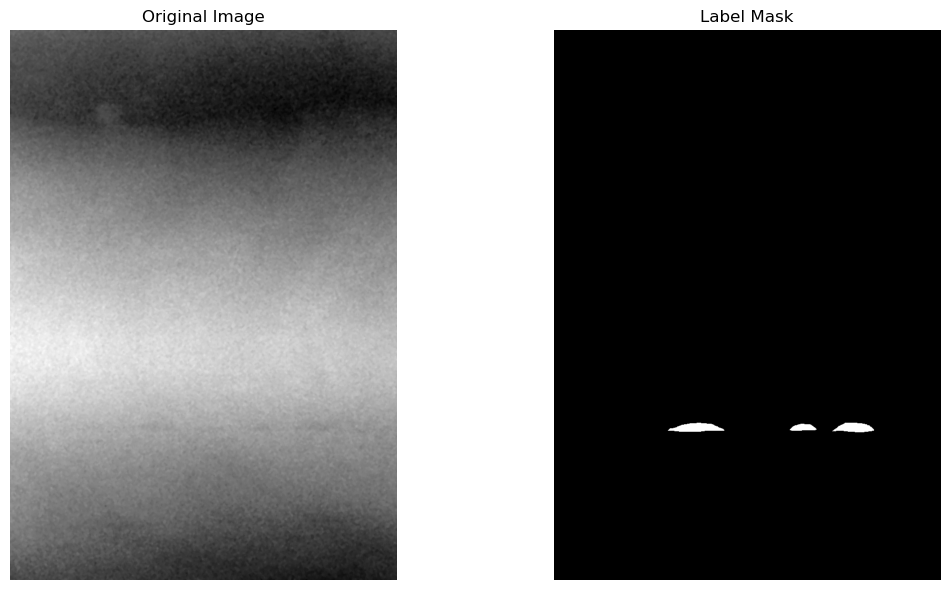

Displaying image index: 52
Image path: /home/kieta_tran/projects/xray-detection/data/gdxray/welding/W0001/W0001_0052.png
Image original height: 1091
Image original width: 768


In [37]:
# Randomly select an image index
idx = np.random.randint(0, len(dataset))

# Get image and label
image, label = dataset[idx]

# Convert tensors to numpy arrays for visualization
image_np = image.numpy().squeeze()  # Remove channel dim since grayscale
label_np = label.numpy().squeeze()

# Create figure with two subplots
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot label mask
plt.subplot(1, 2, 2)
plt.imshow(label_np, cmap='gray')
plt.title('Label Mask') 
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Displaying image index: {idx}")
print(f"Image path: {dataset.image_info[idx]['path']}")
print(f"Image original height: {dataset.image_info[idx]['height_org']}")
print(f"Image original width: {dataset.image_info[idx]['width_org']}")

In [8]:
def compare_transforms(original_img, original_label, transformed_img, transformed_label, transform_name="Transformed"):
    """
    Compare original and transformed images/labels side by side
    
    Args:
        original_img: Original image tensor
        original_label: Original label tensor  
        transformed_img: Transformed image tensor
        transformed_label: Transformed label tensor
        transform_name: Name of the transform applied (default: "Transformed")
    """
    # Convert tensors to numpy arrays
    orig_img = original_img.numpy().squeeze()
    orig_label = original_label.numpy().squeeze()
    trans_img = transformed_img.numpy().squeeze() 
    trans_label = transformed_label.numpy().squeeze()
    
    # Create figure with 4 subplots in 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    # Plot original image and label
    axes[0,0].imshow(orig_img, cmap='gray')
    axes[0,0].set_title('Original Image')
    axes[0,0].axis('off')
    
    axes[0,1].imshow(orig_label, cmap='gray') 
    axes[0,1].set_title('Original Label')
    axes[0,1].axis('off')
    
    # Plot transformed image and label
    axes[1,0].imshow(trans_img, cmap='gray')
    axes[1,0].set_title(f'{transform_name} Image')
    axes[1,0].axis('off')
    
    axes[1,1].imshow(trans_label, cmap='gray')
    axes[1,1].set_title(f'{transform_name} Label')
    axes[1,1].axis('off')
    
    plt.tight_layout()
    plt.show()


### Gamma transform

tensor(0.) tensor(1.0000)


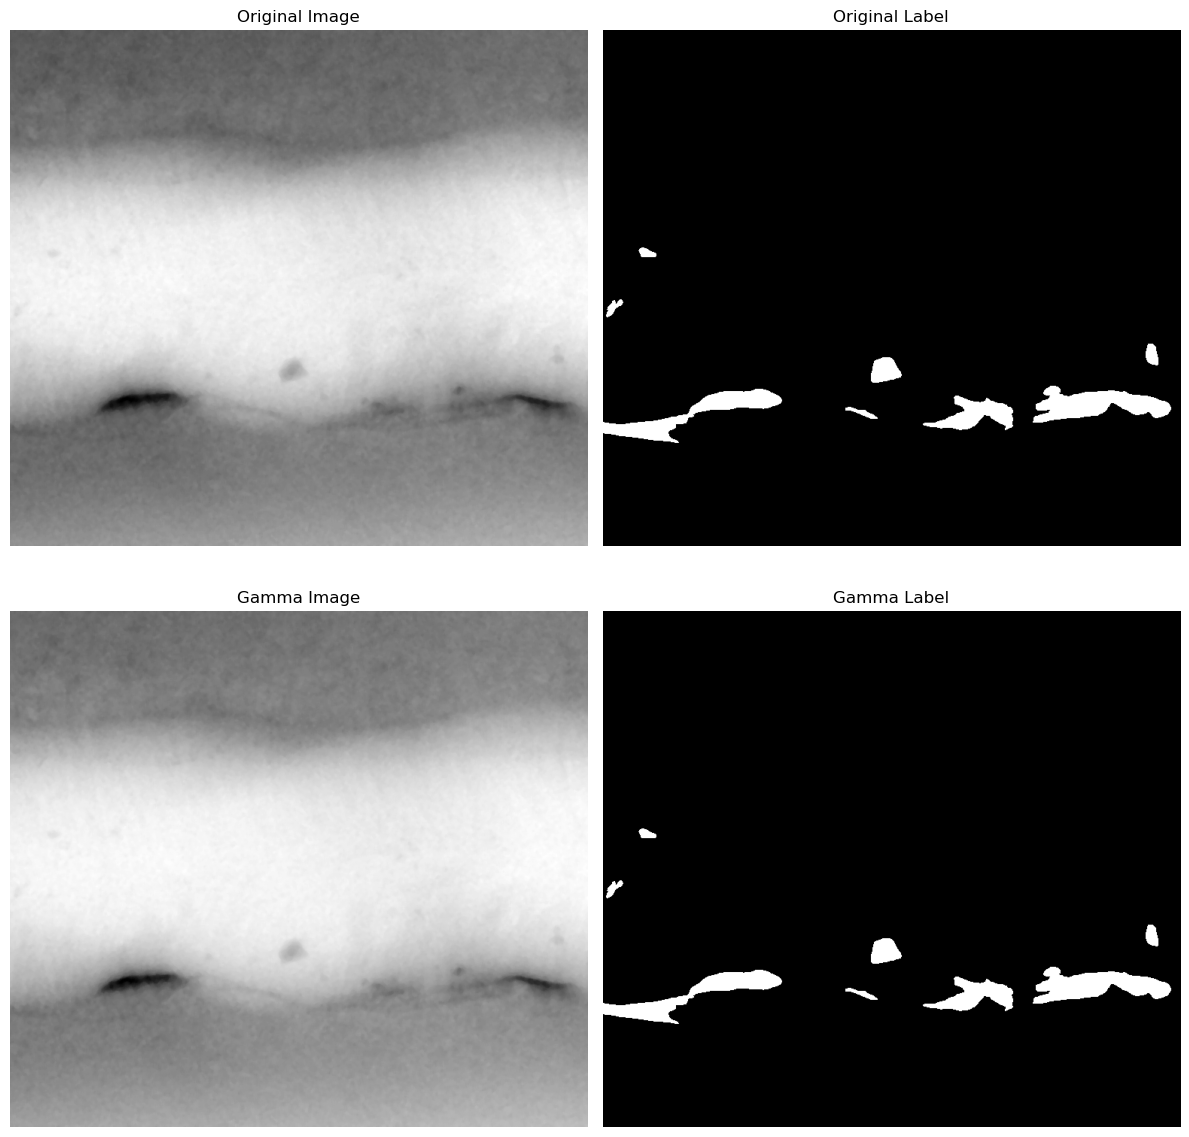

In [24]:
from torchvision.transforms import v2

# use gama transform from augmented.py

gamma_transform = augmented.MyGammaTransform(c=1, gamma=0.7)
gama_image, gama_label = gamma_transform(image, label)

print(gama_image.min(), gama_image.max())

compare_transforms(image, label, transformed_img=gama_image, transformed_label=gama_label, transform_name="Gamma")

### Linear transform

tensor(0.) tensor(1.0000)


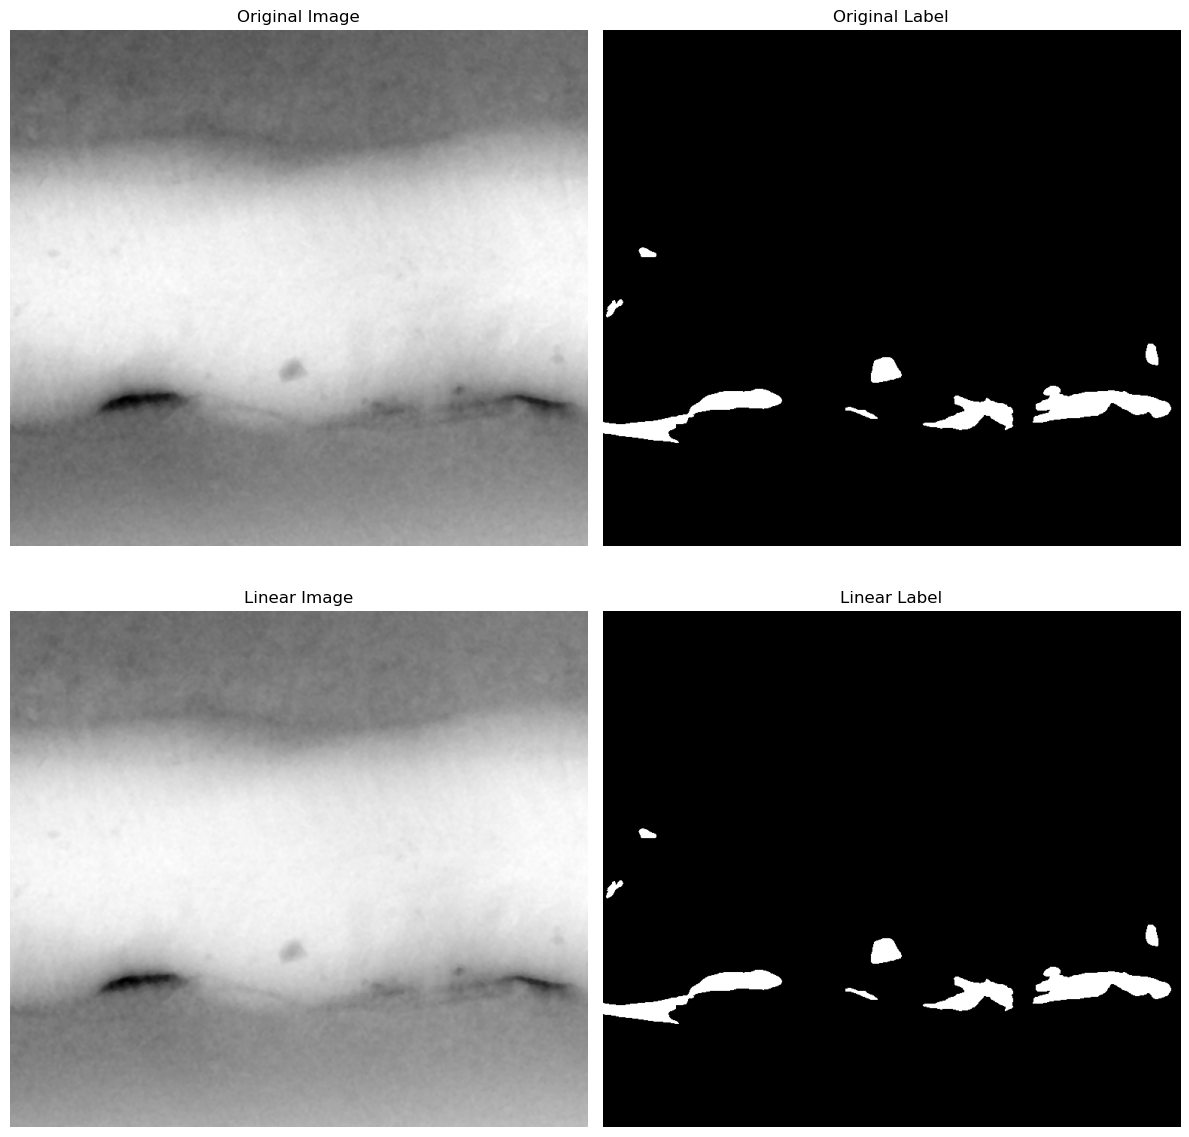

In [25]:
linear_transform = augmented.MyLinearTransform(k=0.85, b=0.3)
linear_image, linear_label = linear_transform(gama_image, gama_label)

print(linear_image.min(), linear_image.max())
compare_transforms(image, label, transformed_img=linear_image, transformed_label=linear_label, transform_name="Linear")


### Gaussian noise

tensor(0.) tensor(1.)


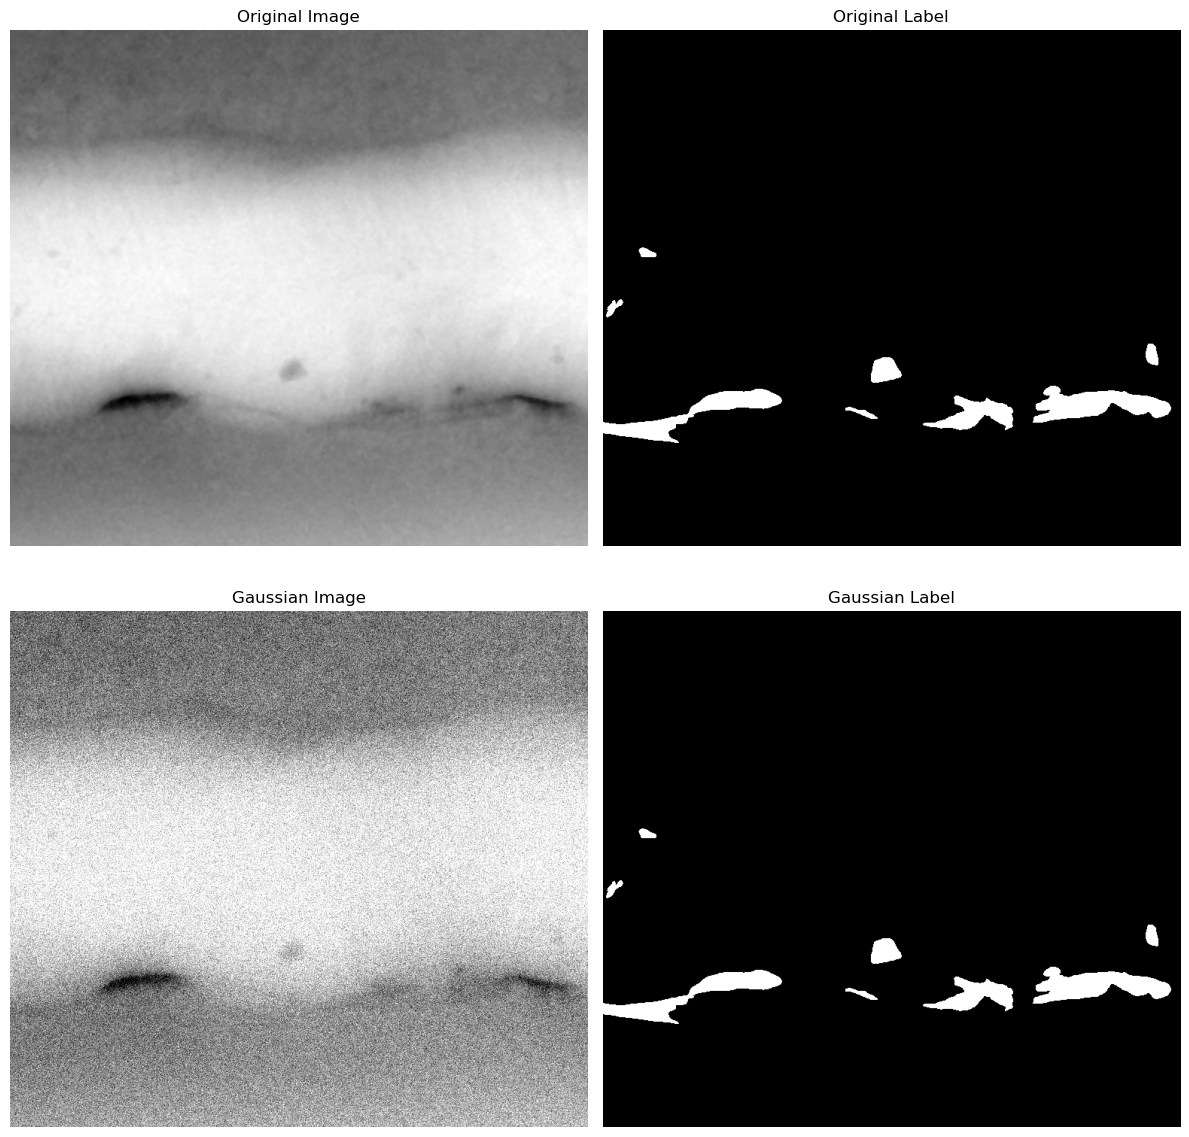

In [28]:
gaussian_transform = v2.GaussianNoise(mean=0, sigma=0.02**0.5)
# input_img = linear_image.clamp(0.0, 1.0)
gaussian_image = gaussian_transform(linear_image)

print(gaussian_image.min(), gaussian_image.max())
compare_transforms(image, label, transformed_img=gaussian_image, transformed_label=label, transform_name="Gaussian")

### Histogram equalization

Dtype of equalized: uint8
Shape of equalized: (686, 768)


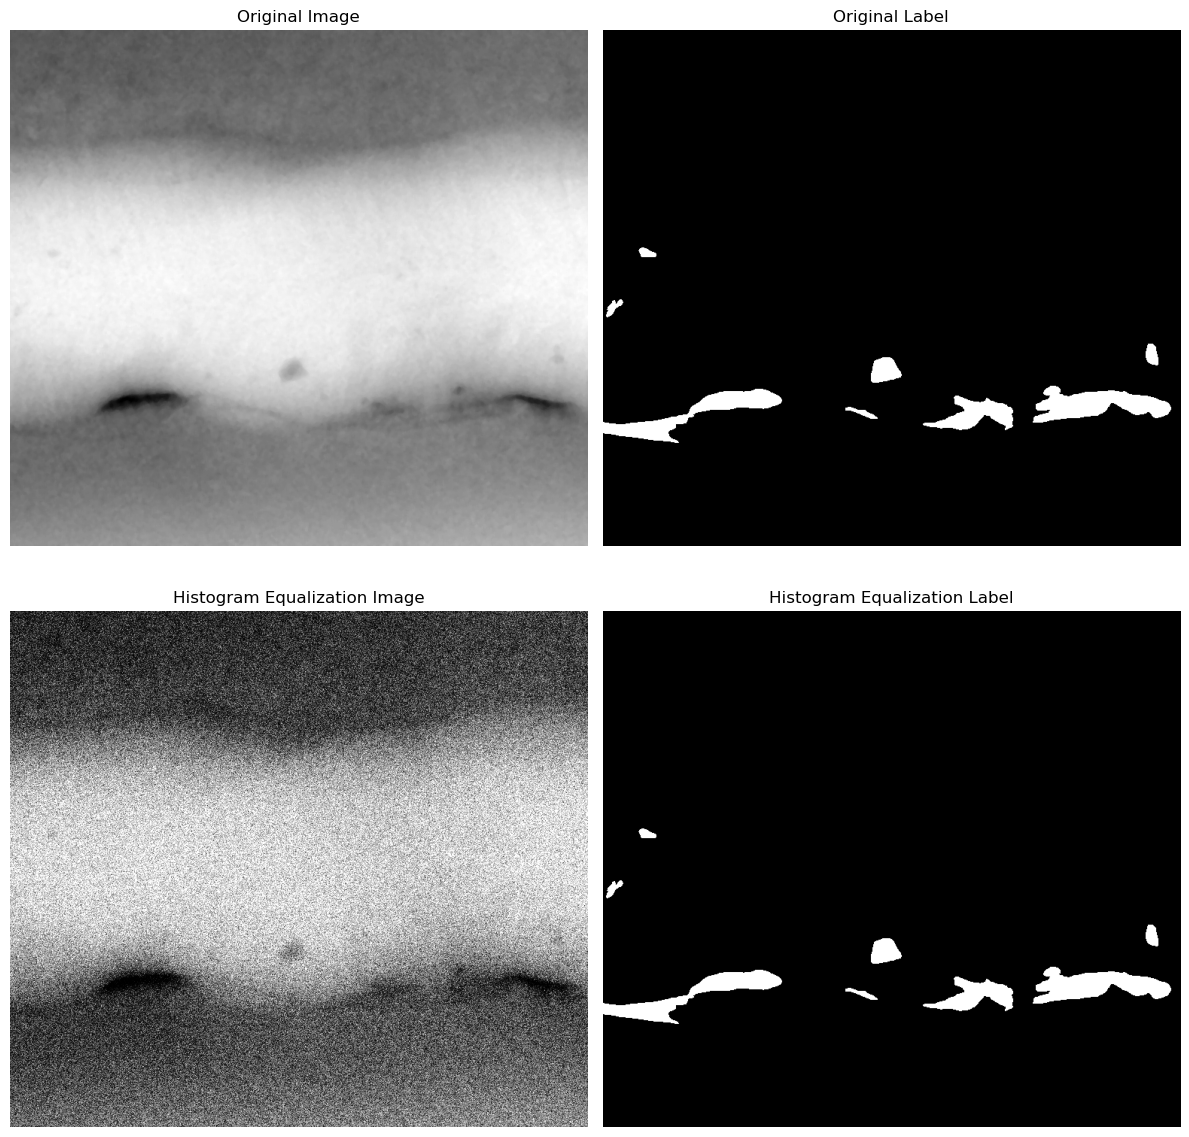

In [29]:
histogram_equalization = augmented.MyHistogramEqualization()
histogram_equalized_image, _ = histogram_equalization(gaussian_image)

compare_transforms(image, label, transformed_img=histogram_equalized_image, transformed_label=label, transform_name="Histogram Equalization")

In [ ]:
test_image = cv2.imread('/home/kieta_tran/projects/xray-detection/data/gdxray/welding/W0001/W0001_0000.png')
torch_img = torch.from_numpy(test_image)
print(torch_img.shape)
equal_img, _ = augmented.MyHistogramEqualization()(torch_img)
print(equal_img.shape)
compare_transforms(torch_img, label, transformed_img=equal_img, transformed_label=label, transform_name="Histogram Equalization")

Adding image:  welding/W0001/W0001_0000.png
Adding image:  welding/W0001/W0001_0001.png
Adding image:  welding/W0001/W0001_0002.png
Adding image:  welding/W0001/W0001_0003.png
Adding image:  welding/W0001/W0001_0004.png
Adding image:  welding/W0001/W0001_0005.png
Adding image:  welding/W0001/W0001_0006.png
Adding image:  welding/W0001/W0001_0007.png
Adding image:  welding/W0001/W0001_0008.png
Adding image:  welding/W0001/W0001_0009.png
Adding image:  welding/W0001/W0001_0010.png
Adding image:  welding/W0001/W0001_0011.png
Adding image:  welding/W0001/W0001_0012.png
Adding image:  welding/W0001/W0001_0013.png
Adding image:  welding/W0001/W0001_0014.png
Adding image:  welding/W0001/W0001_0015.png
Adding image:  welding/W0001/W0001_0016.png
Adding image:  welding/W0001/W0001_0017.png
Adding image:  welding/W0001/W0001_0018.png
Adding image:  welding/W0001/W0001_0019.png
Adding image:  welding/W0001/W0001_0020.png
Adding image:  welding/W0001/W0001_0021.png
Adding image:  welding/W0001/W00

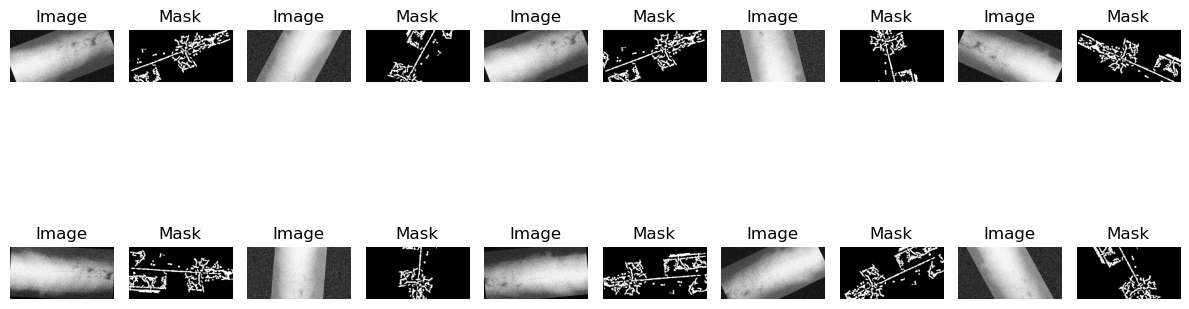

tensor(-1.5799) tensor(1.3787)
tensor(0.) tensor(1.)


In [46]:
aug_dataset = utils.GDXrayDataset(config, labels=config['labels'], transform=augmented.unet_augmentation_train(config['image_size']))

# get 1 random images and visualize it augmented
idx1 = np.random.randint(0, len(aug_dataset))
# print(aug_dataset[idx1][0].shape)
# plt.imshow(aug_dataset[idx1][0].numpy().squeeze(), cmap='gray')
# plt.show()

utils.visualize_augmentations(aug_dataset, idx=idx1)
print(aug_dataset[idx1][0].min(), aug_dataset[idx1][0].max())
print(aug_dataset[idx1][1].min(), aug_dataset[idx1][1].max())

In [47]:
def compute_gray_mean_std(dataset):
    mean = 0.
    std = 0.
    for img, _ in dataset:
        tensor = v2.ToTensor()(img)
        mean += tensor.mean()
        std += tensor.std()
    mean /= len(dataset)
    std /= len(dataset)
    return mean.item(), std.item()

mean, std = compute_gray_mean_std(aug_dataset)
print(mean)
print(std)

-0.008480626158416271
1.001757264137268
